In [6]:
cd 'SF_plotting/'

[Errno 2] No such file or directory: 'SF_plotting/'
/astro/users/suberlak/Desktop/SDSS/SF_plotting


In [10]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 25 13:53:10 2015

@author: suberlak
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib import gridspec
#mp.rcParams.update(mp.rcParamsDefault)
#mp.rcdefaults()

def get_qso_catalog(catalog):
    if catalog == 's82drw':
        File = 'CRTS_SDSS_cross_matched_qso_s82drw_catalog.txt'
    if catalog == 'DB_QSO':
        File = 'CRTS_SDSS_cross_matched_qso_DB_QSO_catalog.txt'
    colnames = open(File,'r').read().splitlines()[0][1:].split()
    datatable = np.genfromtxt(File)
    qso_catalog = {}
    print 'Zipping CRTS-SDSS quasars catalog from ', File, ' ...'
    for label, column in zip(colnames, datatable.T):
        qso_catalog[label] = column
    
    qso_names = np.genfromtxt('CRTS_SDSS_cross_matched_qso_names.txt', dtype=str)    
    for i in range(len(qso_names)):
        qso_names[i] = qso_names[i][4:-4]
    print 'Read in ', len(qso_catalog['redshift']), ', quasars from CRTS'
    return  colnames, qso_catalog, qso_names
    

colnames, qso_catalog, qso_names = get_qso_catalog('DB_QSO')




Zipping CRTS-SDSS quasars catalog from  CRTS_SDSS_cross_matched_qso_DB_QSO_catalog.txt  ...
Read in  7601 , quasars from CRTS


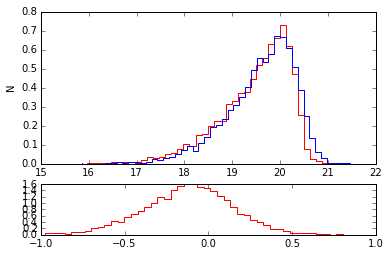

In [47]:
%matplotlib inline 

fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax.set_ylabel('N')
nbins=50

mask = qso_catalog['r'] != 0

hist1, bin_edges = np.histogram(qso_catalog['CRTS_avg_m'][mask], bins = nbins, density=True)
bin_cen1 = (bin_edges[:-1] + bin_edges[1:])/2

# exclude those 17 objects that don't have SDSS r mag 
#hist2, bin_edges = np.histogram(qso_catalog['r'][qso_catalog['r'] != 0], bins=nbins, density=True)

hist2, bin_edges = np.histogram(qso_catalog['r'][mask], bins=nbins, density=True)
bin_cen2 = (bin_edges[:-1] + bin_edges[1:])/2

ax.plot(bin_cen1, hist1, color = 'red', ls='steps', label='CRTS avg LC  mag')
ax.plot(bin_cen2, hist2, color = 'blue', ls='steps', label='SDSS r mag')



res = qso_catalog['CRTS_avg_m'][mask]-qso_catalog['r'][mask]

# for plotting remove those where |CRTS_<mag> - SDSS_r| > 1 

hist3, bin_edges = np.histogram(res[np.where(abs(res)<1)[0]], bins=nbins, density=True)
bin_cen3 = (bin_edges[:-1] + bin_edges[1:])/2

ax1.plot(bin_cen3, hist3, color = 'red', ls='steps')

#ax.set_xlim(xmin=15, xmax=22)
#ax.legend(loc='upper left')
plt.show()


Mean, mode and stdev  of the distribution...


In [31]:
from scipy.stats import mode
print('Mean: %f' % np.mean(res))
print('Mode: %f' % mode(res, axis=0)[0][0])
print('Standard deviation: %f' % np.std(res))

Mean: -0.111355
Mode: -0.211030
Standard deviation: 0.300082


Analyze the outliers : show how many differ by more than a magnitude, and what they look like... 

In [45]:
outliers = np.where(abs(res) > 1)[0]
len(qso_catalog['CRTS_avg_m'][mask][outliers])

68

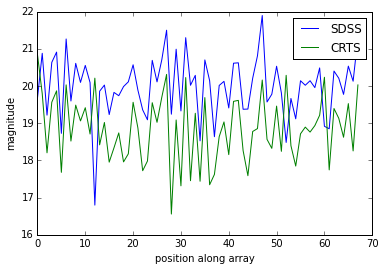

In [44]:
x = np.arange(len(qso_catalog['r'][mask][outliers]))

plt.plot(x,qso_catalog['r'][mask][outliers], label='SDSS')
plt.plot( x, qso_catalog['CRTS_avg_m'][mask][outliers] , label='CRTS')
plt.ylabel('magnitude')
plt.xlabel('position along array')
plt.legend()